In [1]:
import io 
from google.colab import drive
drive.mount('gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from zipfile import ZipFile
from tqdm import tqdm_notebook

In [0]:
mid30 = ZipFile('/content/gdrive/My Drive/Colab Notebooks/Data/mid30.zip', "r")
netease = ZipFile('/content/gdrive/My Drive/Colab Notebooks/Data/Netease - Western Digital.zip', "r")
Activision = ZipFile('/content/gdrive/My Drive/Colab Notebooks/Data/Activision-fastenal_csv.zip', "r")

In [0]:
zipnames = [mid30, netease, Activision]

In [5]:
dfs = {dfile.filename: pd.read_excel(zipfile.extract(dfile.filename))
       for zipfile in zipnames
       for dfile in tqdm_notebook(zipfile.infolist())
       if dfile.filename.endswith('.xlsx')}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
len(dfs.keys())

100

In [7]:
data = pd.concat(dfs, keys = list(dfs.keys()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
len(data)

43361

In [9]:
data

Did not extract fully  ...                                            snippet
Facebook Inc.xlsx     0                         NaN  ...  Companies are paying small armies of people in...
                      1                         NaN  ...  Since leaving Facebook in 2010, Brandee Barker...
                      2                         NaN  ...  Being the son of a mayor has its advantages. F...
                      3                         NaN  ...  After a breach that exposed 4.6 million Snapch...
                      4                         NaN  ...  A new campaign for Staples promotes the fact t...
...                                             ...  ...                                                ...
Fastenal Company.xlsx 161  2014-08-22T02:45:24+0000  ...  Often ignored by front-rank architects, left t...
                      162  2014-08-22T20:38:11+0000  ...  Bruce Lundvall, a former president of Blue Not...
                      163  2014-08-25T19:18:51+0000  ...  Gaza’s premier distance runner, Nader al-Masri...
                      164  2014-08-28T22:02:11+0000  ...  A guide to Labor Day Weekend, including events...
                      165  2014-08-21T22:44:16+0000  ...  A guide to fairs, film and music festivals, li...

[43361 rows x 5 columns]

In [0]:
data_snippets = data.snippet.tolist()

In [11]:
score = []
for snippet in tqdm_notebook(data_snippets):
    test = TextBlob(str(snippet))
    score.append(test.sentiment.polarity)
data['polarity'] = score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
#-- get target o/p using textblob
conditions = [
    (data['polarity'] >= 0.05),
    (data['polarity'] <= -0.05),
    (-0.05 < data['polarity'].all() < 0.05)]
choices = [1, 0, 'Neutral']
data['target'] = np.select(conditions, choices)

target_list = data.target.tolist()

Text(0.5, 1.0, 'Targets')

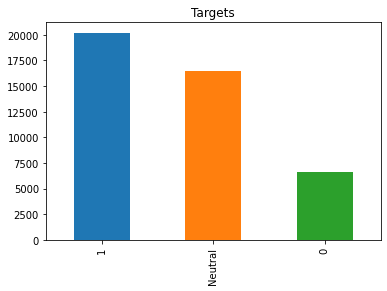

In [13]:
#-- EDA
pd.DataFrame(data.target.value_counts().head(3))
data.target.value_counts().head(3).plot(kind='bar', color=['C0','C1','C2']);plt.title('Targets')


In [14]:
for index, row in tqdm_notebook(data.iterrows()):
  try:
    if len(row.pub_date) == 0:
      continue
  except:
    data.loc[index, "pub_date" ] = row["Did not extract fully"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [0]:
data = data.drop(columns = ["Did not extract fully"])

In [0]:
data.pub_date = data.pub_date.str[:10].replace("-", "/")

In [17]:
data

abstract  ...   target
Facebook Inc.xlsx     0    Companies are paying small armies of people in...  ...        0
                      1    Since leaving Facebook in 2010, Brandee Barker...  ...        1
                      2    Being the son of a mayor has its advantages. F...  ...        0
                      3    After a breach that exposed 4.6 million Snapch...  ...        1
                      4    A new campaign for Staples promotes the fact t...  ...        1
...                                                                      ...  ...      ...
Fastenal Company.xlsx 161  Often ignored by front-rank architects, left t...  ...        1
                      162  Bruce Lundvall, a former president of Blue Not...  ...  Neutral
                      163  Gaza’s premier distance runner, Nader al-Masri...  ...  Neutral
                      164  A guide to Labor Day Weekend, including events...  ...        1
                      165  A guide to fairs, film and music festivals, li...  ...        1

[43361 rows x 6 columns]

In [0]:
data.to_csv(r'/content/gdrive/My Drive/Colab Notebooks/Data/ML_sentiments.csv', index = False, header=True)

In [0]:
dijadata = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/Combined_News_DJIA.csv')

train = dijadata[dijadata['Date'] < '2015-01-01']
test = dijadata[dijadata['Date'] > '2014-12-31']

trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [71]:
dijascore = []
for tester in tqdm_notebook(testheadlines):
    tester2 = TextBlob(str(tester))
    dijascore.append(tester2.sentiment.polarity)

dijascore = pd.DataFrame(dijascore, columns=["polarity"])
conditions = [
    (dijascore['polarity'] >= 0.00),
    (dijascore['polarity'] <= -0.00)]
choices = [1, 0]
dijascore['target'] = np.select(conditions, choices)

Dijatarget_list = dijascore.target.values.astype(int).tolist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
x = pd.DataFrame([test["Label"].tolist(),Dijatarget_list])
x = x.T

In [76]:
pd.crosstab(x.iloc[:, 0], x.iloc[:, 1], rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,43,143
1,46,146


In [78]:
from sklearn.metrics import classification_report
report = classification_report(test['Label'], Dijatarget_list, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])

positive:  {'precision': 0.5051903114186851, 'recall': 0.7604166666666666, 'f1-score': 0.607068607068607, 'support': 192}
negative:  {'precision': 0.48314606741573035, 'recall': 0.23118279569892472, 'f1-score': 0.31272727272727274, 'support': 186}


In [67]:
dijascore[dijascore['target'] == 0]

,polarity,target
0,-0.011706,0
4,-0.057163,0
6,-0.083629,0
12,-0.025991,0
13,-0.031726,0
...,...,...
349,-0.047710,0
352,-0.034883,0
367,-0.034244,0
373,-0.014015,0
